##  <u>Use case 2:</u> Forecasting Immediate Cleanup Need based on Total Trash Pounds, Items, and Visitor Count

## <u>Model 1:</u> Decision Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the preprocessed data
ocean = pd.read_csv('cleaned_ocean.csv')

# Selecting relevant columns
X = ocean[['Pounds', 'Total Items Collected', 'People']]
y = ocean['Immediate Cleanup Required']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the decision tree model
dt_model = DecisionTreeClassifier(
    max_depth=4,              
    min_samples_split=20,     
    min_samples_leaf=6,       
    random_state=20)
# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_regularized = accuracy_score(y_test, y_pred)
# Precision, Recall, and F1 Score, expressed as a percentage
precision = precision_score(y_test, y_pred, average='weighted') * 100  
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Print the evaluation metrics
print(f"Accuracy (Regularized Decision Tree): {accuracy_regularized*100:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy (Regularized Decision Tree): 99.95%
Precision: 99.95%
Recall: 99.95%
F1 Score: 99.95%


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed data
ocean = pd.read_csv('cleaned_ocean.csv')

# Selecting relevant columns
X = ocean[['Pounds', 'Total Items Collected', 'People']]
y = ocean['Immediate Cleanup Required']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

def predict_cleanup_requirement(pounds, total_items_collected, people):
    # Convert the inputs into a DataFrame
    input_data = pd.DataFrame({'Pounds': [pounds], 
                               'Total Items Collected': [total_items_collected], 
                               'People': [people]})
    
    # Standardize the features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = dt_model.predict(input_data_scaled)

    # Translate the prediction to a more readable format
    if prediction == 0:
        return "No immediate cleanup required"
    else:
        return "Immediate cleanup required"

# Example usage of the function
example_pounds = 100
example_total_items = 50
example_people = 10

prediction = predict_cleanup_requirement(example_pounds, example_total_items, example_people)
print(prediction)

Immediate cleanup required


___

## <u>Model 2:</u> Logistic Regression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize the logistic regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
training_accuracy_lr = accuracy_score(y_train, lr_model.predict(X_train_scaled))
validation_accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Training Accuracy (Logistic Regression): {training_accuracy_lr:.2f}")
print(f"Test Accuracy (Logistic Regression): {validation_accuracy_lr:.2f}")
print(f"Precision (Logistic Regression): {precision_lr:.2f}")
print(f"Recall (Logistic Regression): {recall_lr:.2f}")
print(f"F1 Score (Logistic Regression): {f1_lr:.2f}")


Training Accuracy (Logistic Regression): 0.86
Test Accuracy (Logistic Regression): 0.87
Precision (Logistic Regression): 0.88
Recall (Logistic Regression): 0.87
F1 Score (Logistic Regression): 0.87


In [4]:
def predict_cleanup_requirement(pounds, total_items_collected, people, model, scaler):
    # Convert the inputs into a DataFrame
    input_data = pd.DataFrame({'Pounds': [pounds], 
                               'Total Items Collected': [total_items_collected], 
                               'People': [people]})
    
    # Standardize the features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction_label = lr_model.predict(input_data_scaled)[0]

    # Translate the prediction to a more readable format
    cleanup_classes = ["No immediate cleanup required", "Immediate cleanup required"]
    prediction_readable = cleanup_classes[prediction_label]

    return prediction_readable

# Example usage of the function
example_pounds = 6
example_total_items = 20
example_people = 30

prediction = predict_cleanup_requirement(example_pounds, example_total_items, example_people, lr_model, scaler)
print(prediction)

No immediate cleanup required


___

## <u>Model 3:</u> K-NN

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
training_accuracy_knn = accuracy_score(y_train, knn_model.predict(X_train_scaled))
validation_accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Training Accuracy (KNN): {training_accuracy_knn:.2f}")
print(f"Test Accuracy (KNN): {validation_accuracy_knn:.2f}")
print(f"Precision (KNN): {precision_knn:.2f}")
print(f"Recall (KNN): {recall_knn:.2f}")
print(f"F1 Score (KNN): {f1_knn:.2f}")


C:\Users\desha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\desha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training Accuracy (KNN): 0.99
Test Accuracy (KNN): 0.98
Precision (KNN): 0.98
Recall (KNN): 0.98
F1 Score (KNN): 0.98


In [6]:
def predict_cleanup_requirement_knn(pounds, total_items_collected, people, model, scaler):
    # Convert the inputs into a DataFrame
    input_data = pd.DataFrame({'Pounds': [pounds], 
                               'Total Items Collected': [total_items_collected], 
                               'People': [people]})
    
    # Standardize the features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction_label = knn_model.predict(input_data_scaled)[0]

    # Translate the prediction to a more readable format
    cleanup_classes = ["No immediate cleanup required", "Immediate cleanup required"]
    prediction_readable = cleanup_classes[prediction_label]

    return prediction_readable

# Example usage of the function with KNN model
example_pounds_knn = 100
example_total_items_knn = 50
example_people_knn = 10

prediction_knn = predict_cleanup_requirement_knn(example_pounds_knn, example_total_items_knn, example_people_knn, knn_model, scaler)
print(prediction_knn)


Immediate cleanup required


C:\Users\desha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


___

## <u>Model 4:</u> SVM

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print the evaluation metrics
print(f"Accuracy (SVM): {accuracy_svm:.2f}")
print(f"Precision (SVM): {precision_svm:.2f}")
print(f"Recall (SVM): {recall_svm:.2f}")
print(f"F1 Score (SVM): {f1_svm:.2f}")



Accuracy (SVM): 0.88
Precision (SVM): 0.89
Recall (SVM): 0.88
F1 Score (SVM): 0.88


In [8]:

def predict_cleanup_requirement_svm(pounds, total_items_collected, people):
    # Convert the inputs into a DataFrame
    input_data = pd.DataFrame({'Pounds': [pounds], 
                               'Total Items Collected': [total_items_collected], 
                               'People': [people]})
    
    # Standardize the features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction with the SVM model
    prediction = svm_model.predict(input_data_scaled)

    # Translate the prediction to a more readable format
    if prediction == 0:
        return "No immediate cleanup required"
    else:
        return "Immediate cleanup required"


example_pounds = 3 
example_total_items = 57 
example_people = 7  

# Using the updated function
prediction_svm = predict_cleanup_requirement_svm(example_pounds, example_total_items, example_people)
print(prediction_svm)

No immediate cleanup required


___

## A comparative Visualization of various metrics of different machine learning algorithms

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
algorithms = ['Decision Tree', 'Logistic Regression', 'KNN', 'SVM']
accuracy = [0.99, 0.87, 0.98, 0.88]
precision = [0.99, 0.88, 0.98, 0.89]
recall = [0.99, 0.87, 0.98, 0.88]
f1_score = [0.99, 0.87, 0.98, 0.88]

# Create DataFrames
accuracy_data = pd.DataFrame({'Algorithm': algorithms, 'Accuracy': accuracy})
precision_data = pd.DataFrame({'Algorithm': algorithms, 'Precision': precision})
recall_data = pd.DataFrame({'Algorithm': algorithms, 'Recall': recall})
f1_score_data = pd.DataFrame({'Algorithm': algorithms, 'F1 Score': f1_score})


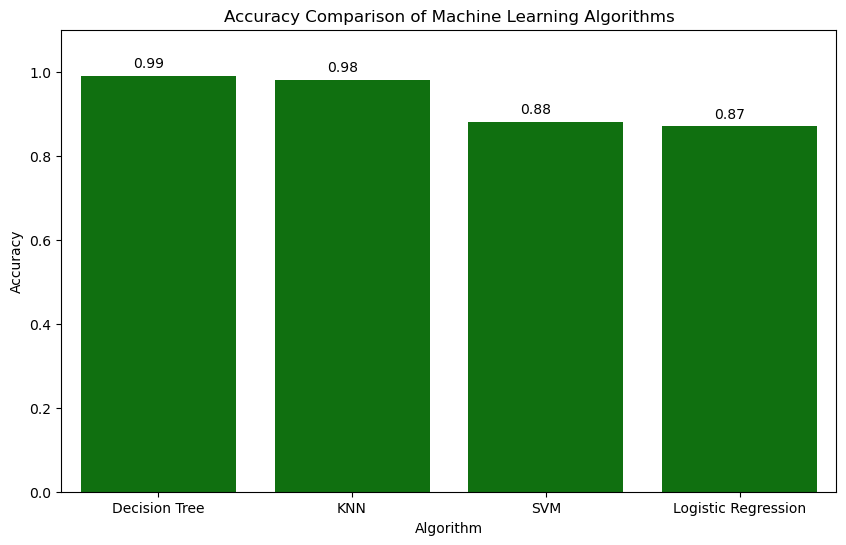

In [10]:
# Sort the accuracy_data DataFrame by 'Accuracy'
accuracy_data_sorted = accuracy_data.sort_values(by='Accuracy', ascending=False)

# Plotting Accuracy with all bars in the same color and values on top
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_data_sorted, color='green')  # Set color to green or any desired color
plt.title('Accuracy Comparison of Machine Learning Algorithms')
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1 for better visibility

# Add text labels on top of each bar
for bar in plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center')

plt.show()

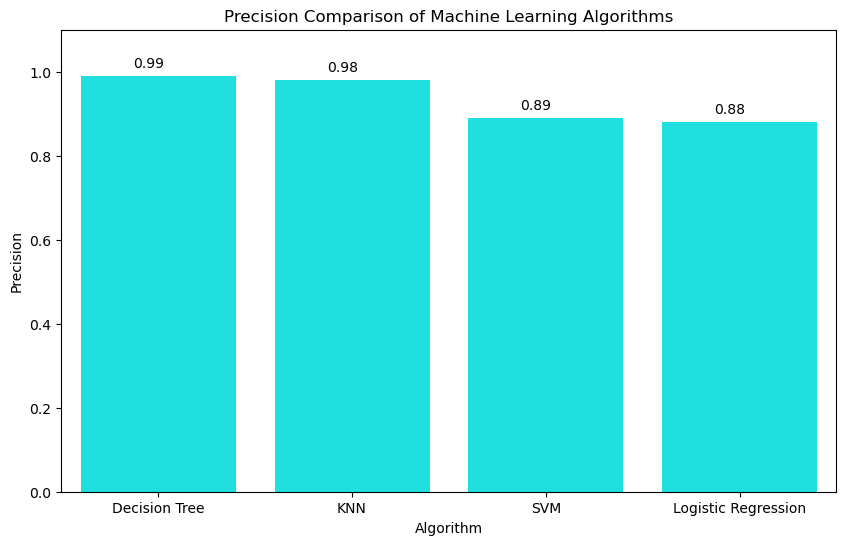

In [11]:
# Sort the precision_data DataFrame by 'Precision' in descending order
precision_data_sorted = precision_data.sort_values(by='Precision', ascending=False)

# Plotting Precision with all bars in the same color and values on top
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Algorithm', y='Precision', data=precision_data_sorted, color='aqua')  # Set color to blue or any desired color
plt.title('Precision Comparison of Machine Learning Algorithms')
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1 for better visibility

# Add text labels on top of each bar
for bar in plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center')

plt.show()

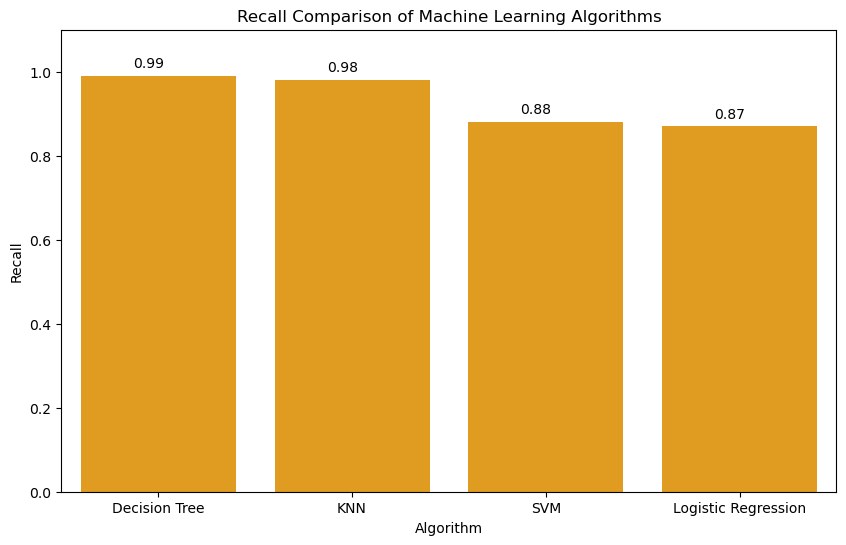

In [12]:
# Sort the recall_data DataFrame by 'Recall' in descending order
recall_data_sorted = recall_data.sort_values(by='Recall', ascending=False)

# Plotting Recall with all bars in the same color and values on top
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Algorithm', y='Recall', data=recall_data_sorted, color='orange')  # Set color to orange or any desired color
plt.title('Recall Comparison of Machine Learning Algorithms')
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1 for better visibility

# Add text labels on top of each bar
for bar in plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center')

plt.show()

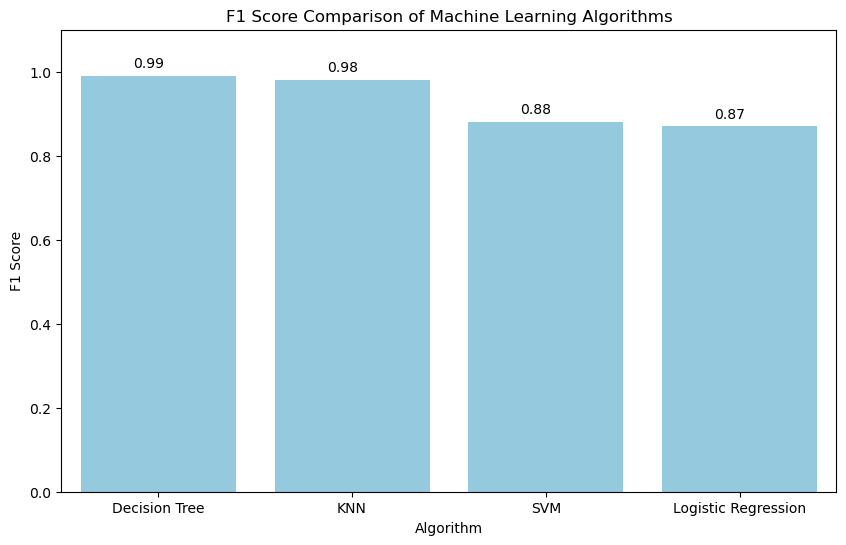

In [13]:
# Sort the f1_score_data DataFrame by 'F1 Score' in descending order
f1_score_data_sorted = f1_score_data.sort_values(by='F1 Score', ascending=False)

# Plotting F1 Score with all bars in the same color and values on top
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Algorithm', y='F1 Score', data=f1_score_data_sorted, color='skyblue')  # Set color to orange or any desired color
plt.title('F1 Score Comparison of Machine Learning Algorithms')
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1 for better visibility

# Add text labels on top of each bar
for bar in plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center')

plt.show()